<a href="https://colab.research.google.com/github/VictorMtMwr/PROJETS/blob/main/notebooks/assignment_01_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Introduction to projective geometry

Andrés Marrugo, PhD    
Universidad Tecnológica de Bolívar    

Adapted from Magnus Oskarsson, Lund University

In this homework we will study the representation of points, lines and planes, and also their transformations under projection.

The exercises are to be solved by "hand" although you may write the answers in markdown/LaTex or include a snapshot of your solution. The computer exercises are to be solved in the corresponding code cell. Enjoy!

## Points in Homogeneous Coordinates

### Exercise 1

 What is the 2D Cartesian coordinates of the points with homogeneous coordinates

\begin{align}
\mathbf{x_1} = \left(
\begin{array}{c}
4\\
-2\\
2\\
\end{array}
\right)
,\enspace
\mathbf{x_2} = \left(
\begin{array}{c}
3\\
-2\\
-1\\
\end{array}
\right)
, \enspace \text{and }
\mathbf{x_3} = \left(
\begin{array}{c}
4\lambda\\
-2\lambda\\
2\lambda\\
\end{array}
\right)
,\enspace
\lambda \neq 0?
\end{align}


What is the interpretation of the point with homogeneous coordinates

\begin{align}
\mathbf{x_4} = \left(
\begin{array}{c}
4\\
-2\\
0\\
\end{array}
\right)
\enspace?
\end{align}

*For the report: Answers are enough.*


### Computer Exercise 1.
Write a Python function `pflat` that divides the homogeneous coordinates with their last entry for points of any dimensionality. (You may assume that none of the points have last homogeneous coordinate zero.) Apply the function to the points in `x2D` and `x3D` in the file `compEx1.npz`, and plot the result.

In [1]:
import numpy as np
import pandas as pd
import urllib.request
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt


In [4]:
DATA_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/compEx1.npz?raw=true'

urllib.request.urlretrieve(DATA_URL, 'compEx1.npz')

data = np.load('compEx1.npz')

x2D = data['x2D']
x3D = data['x3D']

# print(x2D)
# print(x3D)


2D Cartesian coordinates:
[[ 2.  3.  5.]
 [ 4.  7. 10.]]
3D Cartesian coordinates:
[[ 2.  3.  5.]
 [ 4.  7. 10.]
 [ 1.  1.  1.]]


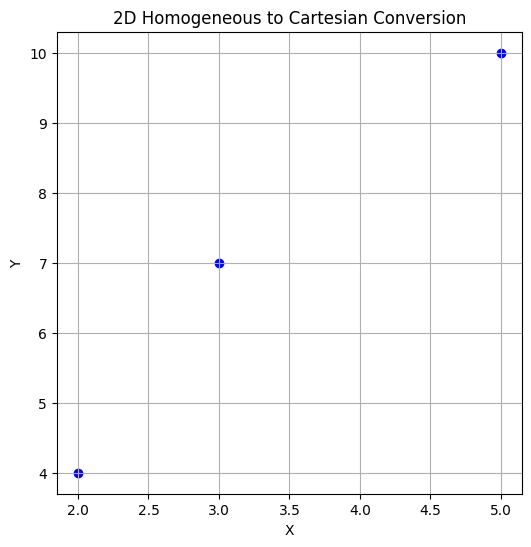

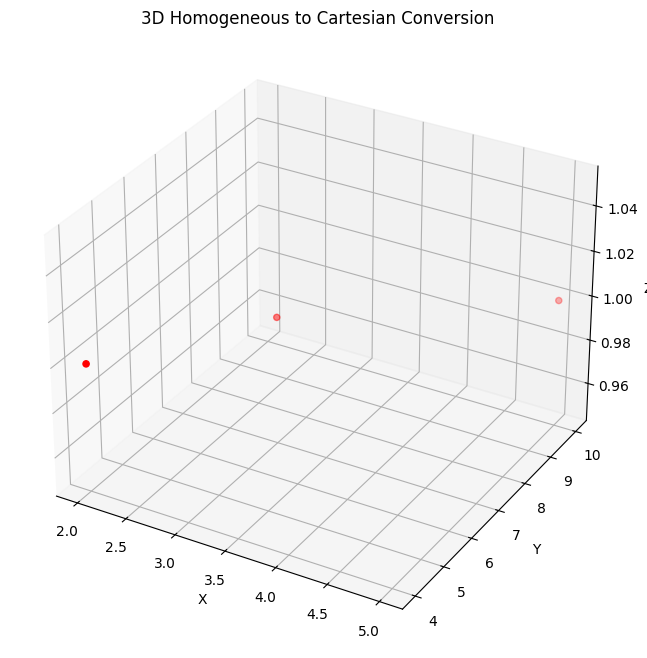

In [5]:
# Computer Exercise 1 - Solution.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pflat(hx):
    ''' pflat - Normalizes array of homogeneous coordinates (2D or 3D) and converts
        to cartesian (inhomogeneous) coordinates.

        Usage:  x = pflat(hx)
        Argument:
            hx  - an N x npts array of homogeneous coordinates.
        Returns:
            x - an (N-1) x npts array of cartesian (inhomogeneous) coordinates
    '''


    x = hx[:-1] / hx[-1]

    return x


x2D = np.array([[2, 3, 5], [4, 7, 10], [1, 1, 1]])
x2Dn = pflat(x2D)
print(f'2D Cartesian coordinates:\n{x2Dn}')


x3D = np.array([[2, 3, 5], [4, 7, 10], [1, 1, 1], [1, 1, 1]])
x3Dn = pflat(x3D)
print(f'3D Cartesian coordinates:\n{x3Dn}')

# Plotting 2D points
plt.figure(figsize=(6, 6))
plt.scatter(x2Dn[0], x2Dn[1], color='b')
plt.title('2D Homogeneous to Cartesian Conversion')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Plotting 3D points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3Dn[0], x3Dn[1], x3Dn[2], color='r')
ax.set_title('3D Homogeneous to Cartesian Conversion')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()




### Exercise 2

Compute the homogeneous coordinates of the intersection (in $\mathbb{P}^2$) of the lines

\begin{align}
l_1 = \left(
\begin{array}{c}
1\\
1\\
1\\
\end{array}
\right)
, \enspace \text{and }
l_2 = \left(
\begin{array}{c}
3\\
2\\
1\\
\end{array}
\right)
.\enspace
\end{align}

What is the corresponding point in $\mathbb{R}^2$?

Compute the intersection (in $\mathbb{P}^2$) of the lines

\begin{align}
l_3 = \left(
\begin{array}{c}
1\\
2\\
3\\
\end{array}
\right)
, \enspace \text{and }
l_4 = \left(
\begin{array}{c}
1\\
2\\
1\\
\end{array}
\right)
.\enspace
\end{align}

what is the geometric interpretation in $\mathbb{R}^2$?

Compute the line that goes through the points with Cartesian coordinates

\begin{align}
x_1 = \left(
\begin{array}{c}
1\\
1\\
\end{array}
\right)
, \enspace \text{and }
x_2 = \left(
\begin{array}{c}
3\\
2\\
\end{array}
\right)
.\enspace
\end{align}

Hint: Re-use the calculations from the line intersections above.

*For the report: Submit a complete solution.*

### Computer exercise 2

Load and plot the image in compEx2.jpg.

In the file `compEx2.npz` there are three pairs of image points. Plot the image points in the same figure as the image.

For each pair of points compute the line going through the points. Use the function `linePoints` to plot the lines in the same image. Do these lines appear to be parallel (in 3D)?

Compute the point of intersection between the second and third line (the lines obtained from the pairs `p2` and `p3`). Plot this point in the same image.

The distance between a 2D-point $x = (x_1, x_2)$ in Cartesian coordinates and a line $l = (a, b, c)$ can be computed using the distance formula

\begin{align}
d = \frac{|ax_1 + bx_2 + c|}{\sqrt{a^2+b^2}}
\end{align}

see your linear algebra book. Compute the distance between the first line and the the intersection point. Is it close to zero? Why/why not?

The distance from x23 to lp1 is 8.27


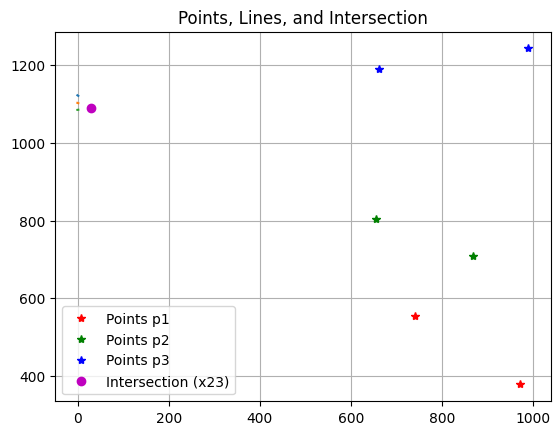

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Function for plotting lines based on the equation ax + by + c = 0
def linePoints(line = [0, 0, 0], ref = [-1., 1.]):
    """given a, b, c for straight line as ax + by + c = 0,
    return and plot a pair of points based on ref values
    e.g linePoints(-1,1,2) == [[-1.0, -3.0], [1.0, -1.0]]
    """
    a = line[0]
    b = line[1]
    c = line[2]
    if (a == 0 and b == 0):
        raise Exception("linePoints: a and b cannot both be zero")
    else:
        points = np.array([[-c/a, p] if b == 0 else [p, (-c - a*p) / b] for p in ref])
        plt.plot(points[:, 0], points[:, 1])
        return points

# Load data
DATA_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/compEx2.npz?raw=true'
urllib.request.urlretrieve(DATA_URL, 'compEx2.npz')

data = np.load('compEx2.npz')

p1 = data['p1']
p2 = data['p2']
p3 = data['p3']



plt.plot(p1[0,:], p1[1,:], 'r*', label='Points p1')
plt.plot(p2[0,:], p2[1,:], 'g*', label='Points p2')
plt.plot(p3[0,:], p3[1,:], 'b*', label='Points p3')

lp1 = np.cross(np.array([p1[0,0], p1[1,0], 1]), np.array([p1[0,1], p1[1,1], 1]))
lp2 = np.cross(np.array([p2[0,0], p2[1,0], 1]), np.array([p2[0,1], p2[1,1], 1]))
lp3 = np.cross(np.array([p3[0,0], p3[1,0], 1]), np.array([p3[0,1], p3[1,1], 1]))


linePoints(lp1, ref=[-1., 1.])
linePoints(lp2, ref=[-1., 1.])
linePoints(lp3, ref=[-1., 1.])

x23 = np.cross(lp2, lp3)


x23 = x23 / x23[2]


plt.plot(x23[0], x23[1], 'mo', label='Intersection (x23)')


d = abs(np.dot(lp1, x23)) / np.linalg.norm(lp1[:2])


print(f'The distance from x23 to lp1 is {d:.2f}')


plt.legend()
plt.grid(True)
plt.title('Points, Lines, and Intersection')
plt.show()


## Projective transformations

### Exercise 3   

Let $H$ be the projective transformation

\begin{align}
H =
\left(
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right) \enspace.
\end{align}

Compute the transformations $\mathbf{y_1} \sim H\mathbf{x_1}$ and $\mathbf{y_2} \sim H\mathbf{x_2}$ if

\begin{align}
\mathbf{x_1} = \left(
\begin{array}{c}
1\\
0\\
1\\
\end{array}
\right)
, \enspace \text{and }
\mathbf{x_2} = \left(
\begin{array}{c}
0\\
1\\
1\\
\end{array}
\right)
.\enspace
\end{align}

Compute the lines $l_1$, $l_2$ containing $\mathbf{x_1}$, $\mathbf{x_2}$, and $\mathbf{y_1}$, $\mathbf{y_2}$, respectively.

Compute $(H^{-1})^T l_1$ and compare to $l_2$.

*For the report: Submit the answers.*

### Computer Exercise 3

The file `compEx3.npz` contains the start and end points of a set of lines. Plotting the lines gives the grid shown in the figure below.

For each of the projective mappings given by the matrices

\begin{align}
H_1 =
\left(
\begin{array}{ccc}
\sqrt{3} & -1 & 1 \\
1 & \sqrt{3} & 1 \\
0 & 0 & 2 \\
\end{array}
\right), \enspace \text{and }
H_2 =
\left(
\begin{array}{ccc}
1 & -1 & 1 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right)
\enspace,
\end{align}

\begin{align}
H_3 =
\left(
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 2 & 0 \\
0 & 0 & 1 \\
\end{array}
\right), \enspace \text{and }
H_4 =
\left(
\begin{array}{ccc}
\sqrt{3} & -1 & 1 \\
1 & \sqrt{3} & 1 \\
1/4 & 1/2 & 2 \\
\end{array}
\right)
\enspace,
\end{align}

compute the transformations of the given start and endpoints and plot the lines between them. (Note that you do not need to loop over the points. One matrix multiplication for the start and end points is enough. To compute cartesian coordinates you can use your `pflat` function. Don’t forget to use the `plt.axis('equal')` command, otherwise the figures might look distorted.)

Which of the transformations preserve lengths between points? Which preserve angles between lines? Which maps parallel lines to parallel lines? Classify the transformations into euclidean, similarity, affine and projective transformations.

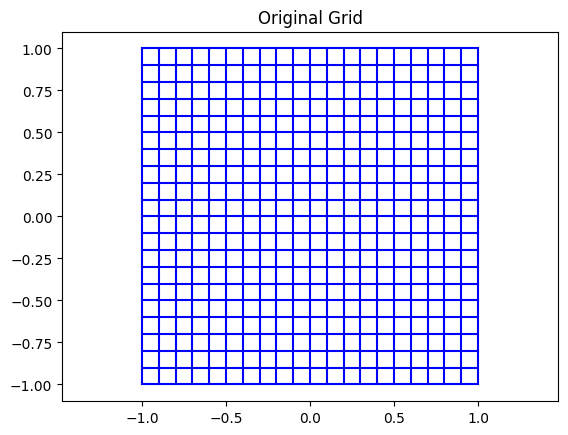

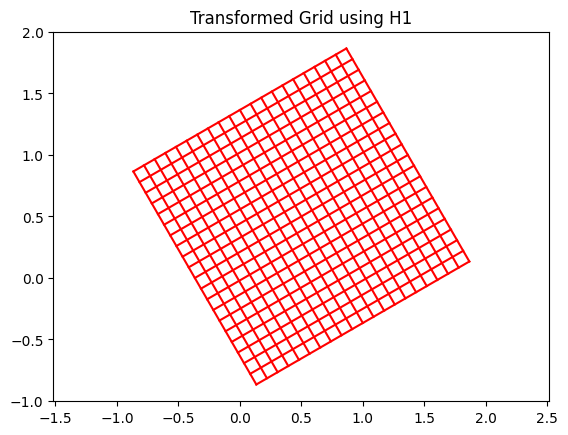

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Load data
DATA_URL = 'https://github.com/agmarrugo/computer-vision-utb/blob/main/data/compEx3.npz?raw=true'
urllib.request.urlretrieve(DATA_URL, 'compEx3.npz')

data = np.load('compEx3.npz')

startpoints = data['startpoints']
endpoints = data['endpoints']

# Function to transform points using a given transformation matrix
def transform_points(points, H):
    # Make the points homogeneous (add a row of 1s)
    homogenous_points = np.vstack((points, np.ones(points.shape[1])))
    # Apply the transformation
    transformed_points = H @ homogenous_points
    # Convert back to Cartesian coordinates (using pflat)
    cartesian_points = pflat(transformed_points)
    return cartesian_points

# Plot the original grid (start and end points)
plt.plot([startpoints[0, :], endpoints[0, :]], [startpoints[1, :], endpoints[1, :]], 'b-')
plt.axis('equal')
plt.title('Original Grid')
plt.show()


H1 = np.array([[np.sqrt(3), -1, 1], [1, np.sqrt(3), 1], [0, 0, 2]])


transformed_startpoints_H1 = transform_points(startpoints, H1)
transformed_endpoints_H1 = transform_points(endpoints, H1)


plt.plot([transformed_startpoints_H1[0, :], transformed_endpoints_H1[0, :]],
         [transformed_startpoints_H1[1, :], transformed_endpoints_H1[1, :]], 'r-')
plt.axis('equal')
plt.title('Transformed Grid using H1')
plt.show()

